In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
data = pd.read_csv('data/UserChurn.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


#### Смотрим на рандомную строчку

In [3]:
data.iloc[np.random.randint(data.shape[0])]

ClientPeriod                                       26
MonthlySpending                                  88.8
TotalSpent                                    2274.35
Sex                                            Female
IsSeniorCitizen                                     0
HasPartner                                         No
HasChild                                           No
HasPhoneService                                   Yes
HasMultiplePhoneNumbers                            No
HasInternetService                        Fiber optic
HasOnlineSecurityService                           No
HasOnlineBackup                                    No
HasDeviceProtection                                No
HasTechSupportAccess                               No
HasOnlineTV                                       Yes
HasMovieSubscription                              Yes
HasContractPhone                       Month-to-month
IsBillingPaperless                                Yes
PaymentMethod               

## Разведовочный анализ

In [4]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


#### IsSeniorCitizen и Churn - эти колонки являются бинарными, когда ClientPeriod и MonthlySpending - непрерывные

#### Посмотрим какой тип данных имеет каждая колонка

In [5]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

#### TotalSpent оказался объектом, хотя в нем хранятся числа

#### Проверим данные на наличие пропусков.

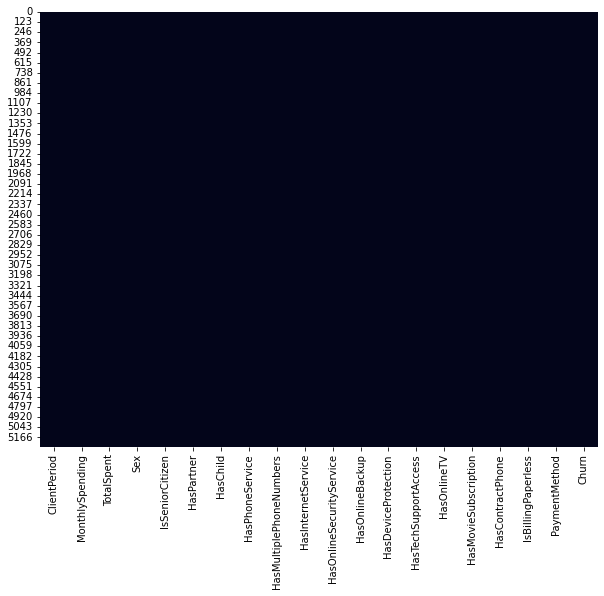


Количество пропусков в каждом столбце: 


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

print('\nКоличество пропусков в каждом столбце: ')
data.isnull().sum()

#### Heatmap и кол-во пропусков говорят, о том, что пропусков нет

#### Пройдемся по значениям категориальных признаков

In [7]:
def cat_num_split(data):
    return data.dtypes[data.dtypes == 'object'].keys(), data.dtypes[data.dtypes != 'object'].keys()

cat_cols, num_cols = cat_num_split(data)
for cat_col in cat_cols:
    print(10 * '-', cat_col, 10 * '-')
    print(data[cat_col].value_counts())
    print('\n')

---------- TotalSpent ----------
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64


---------- Sex ----------
Male      2655
Female    2627
Name: Sex, dtype: int64


---------- HasPartner ----------
No     2705
Yes    2577
Name: HasPartner, dtype: int64


---------- HasChild ----------
No     3676
Yes    1606
Name: HasChild, dtype: int64


---------- HasPhoneService ----------
Yes    4761
No      521
Name: HasPhoneService, dtype: int64


---------- HasMultiplePhoneNumbers ----------
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64


---------- HasInternetService ----------
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64


---------- HasOnlineSecurityService ----------
No                     2612
Yes                    1529
No inte

#### Здесь видно, что TotalSpent имеет 9 пропущенных значений, записанных пробелом. Заполнять их средним/случайным значением не имеет смысла, так как 9 пропущенных значений - 9 объектов из 5282. Удалить их будет лучшим решением.

In [32]:
data.drop(data.loc[data['TotalSpent'] == " "].index, inplace=True)

data['TotalSpent'] = data['TotalSpent'].astype('float')
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('object') # т.к хранит 1 или 0 - те буливое распределение

#### Построим корреляционную матрицу

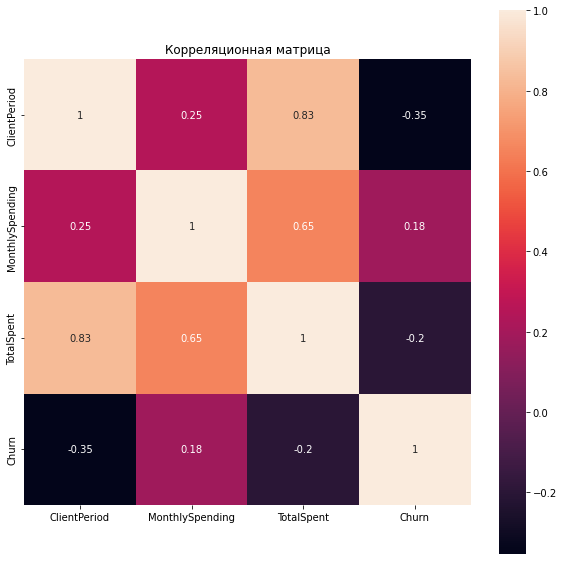

In [70]:
def corrmat(data):
    plt.figure(figsize=(10, 10))
    sns.heatmap(data.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 10}).set_title('Корреляционная матрица')
    plt.show()

corrmat(data)

#### Отсюда видим зависимости: <b style='color:white'>TotalSpent - ClientPeriod</b>, <b style='color:white'>MonthlySpending-TotalSpent</b>

### Теперь посмотрим на целевую переменную - Churn:

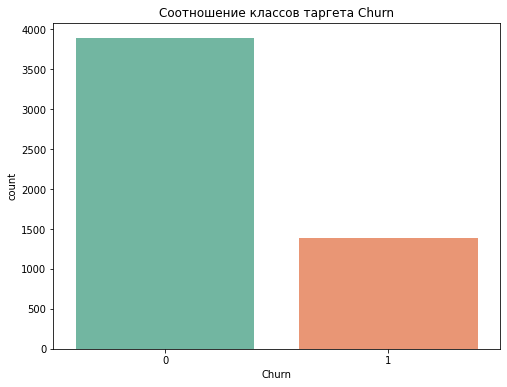

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', palette="Set2").set_title('Соотношение классов таргета Churn')
plt.show()

In [88]:
print(f'Процент пользователей, которые уходят: {round(100 * data[data.Churn == 1].shape[0] / data.shape[0])}%')

Процент пользователей, которые уходят: 26%


#### 26% пользователей отказываются от услуг компании - это довольно плохой показатель

## Анализ данных

Text(0.5, 1.0, 'Разброс ClientPeriod относительно TotalSpent')

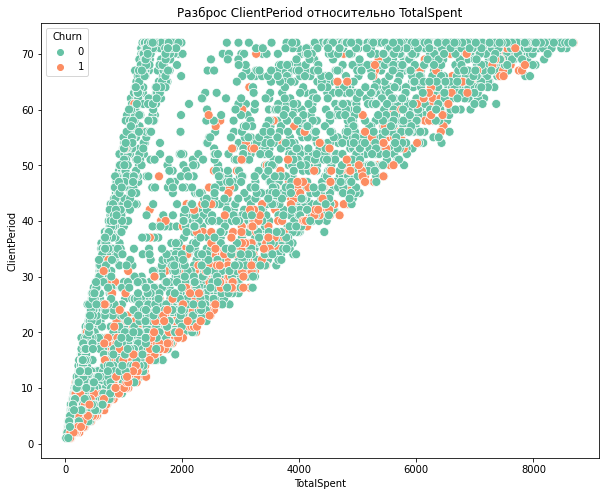

In [105]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='TotalSpent', y='ClientPeriod', s=80, 
                hue='Churn', palette='Set2').set_title('Разброс ClientPeriod относительно TotalSpent') 

#### Точки образуют треугольное облако, ограниченное двумя прямыми:
<ul type='cricle'>
    <li><b style='color:white'>Левая прямая</b> - сколько человек может потратить минимально за время, что он является клиентом</li>
    <li><b style='color:white'>Правая прямая</b> - сколько человек может потратить максимально за время, что он является клиентом</li>
</ul>

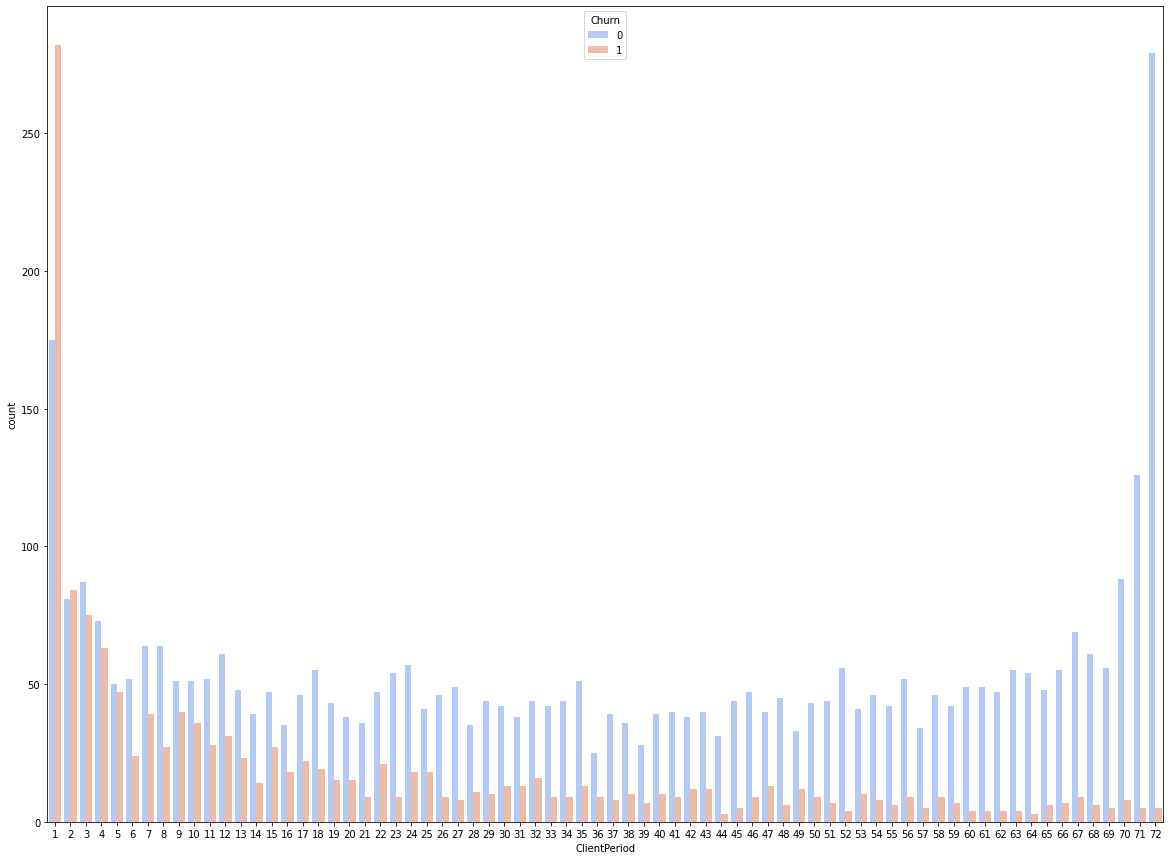

In [116]:
plt.figure(figsize=(20, 15))
sns.countplot(data=data, x='ClientPeriod', hue='Churn', palette='coolwarm')
plt.show()

<p>Уже в первый день большинство людей отказываются от услуг компании, т.е преимущественно новички подвержены риску покинуть компанию. 
Но с каждым днем все меньше и меньше людей это делают, и в конце мы видим, что большинство людей выбирают остаться.</p>

/tmp/ipykernel_3002/1099325936.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


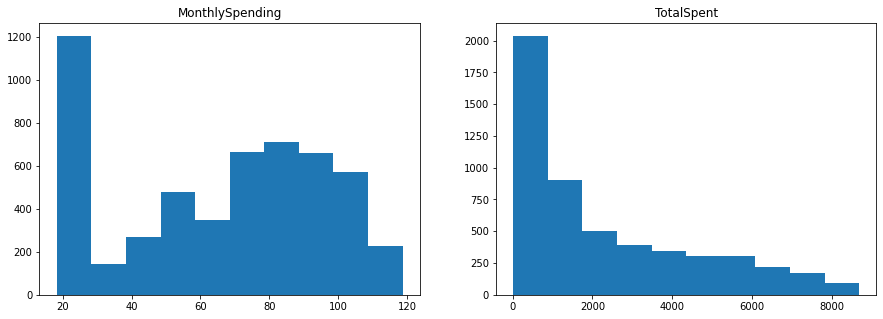

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax = ax.ravel()

numerical_columns = ['MonthlySpending', 'TotalSpent']

for i, column in enumerate(numerical_columns):
    ax[i].set_title(column)
    ax[i].hist(data[column])
    
fig.show()

<p><b>MonthlySpending</b> - показывает, что большинство пользователей тратят 20 каждый месяц. Это ,видимо, минимальный тариф, также видно, что популярный тариф от ~70 до ~100. От 30 до 40 самый непопулярный.</p>
<p><b>TotalSpent</b> - показывает, что большинство большинство тратит до 1000 и чем больше эта цифра, тем меньше людей, что логично, ведь большие суммы тратят мньшее кол-во людей </p

### Посмотрим на категориальные признаки

In [134]:
def plot_features(data, categorical=False, bar_colors='muted'):
    
    palette = sns.color_palette('muted')
    
    cat_cols, num_cols = cat_num_split(data)
    
    if categorical:
        _, ax = plt.subplots(4, 4, figsize=(22, 25))
        
        for i, col in enumerate(cat_cols):
            sns.countplot(data=data, x=col, palette=bar_colors, hue='Churn', ax=ax[i // 4, i % 4]).set_title(f'Соотношение значений в {col}')
            
    else:
        _, ax = plt.subplot(2, 2, figsize=(13, 13))
        
        for i, col in enumerate(num_cols):
            ax[i].plot(data[col])

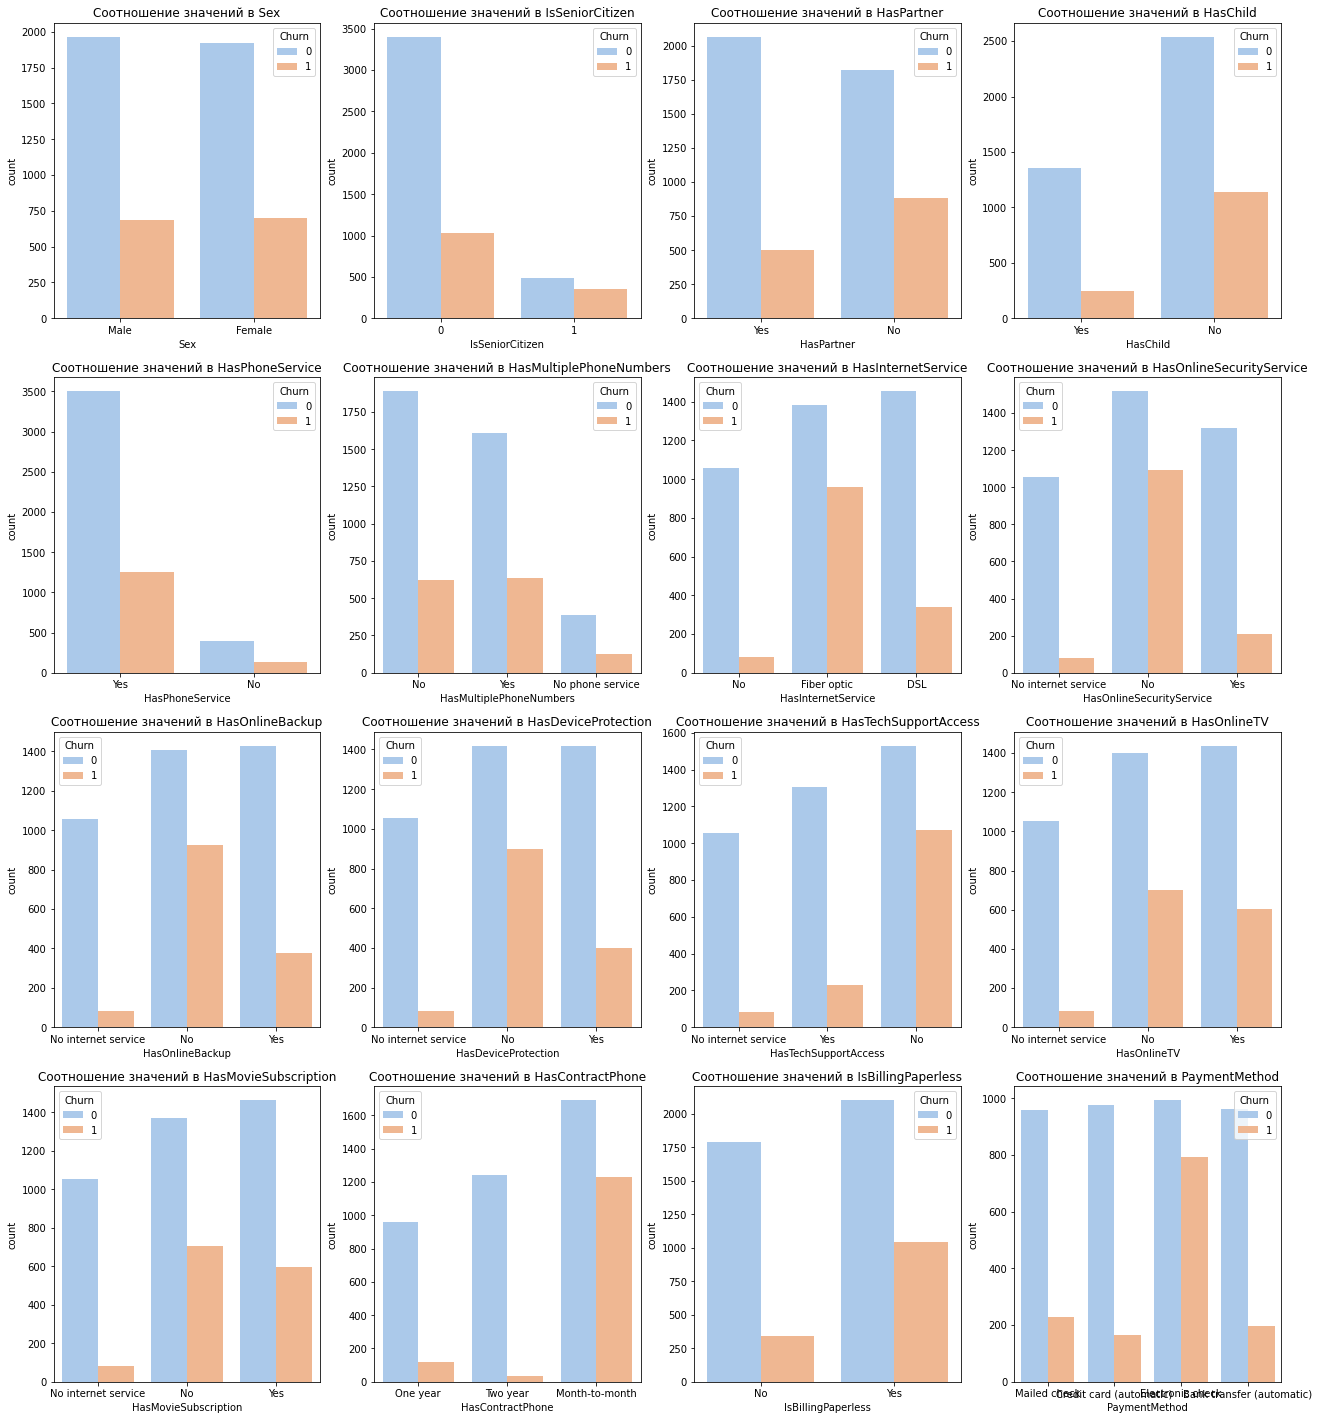

In [136]:
plot_features(data=data, categorical=True, bar_colors='pastel')